In [258]:
import requests
import json
import pandas as pd
from pymongo import MongoClient
import mplfinance as mpf

In [259]:
client = MongoClient('mongodb://localhost:27017/')

In [260]:
stock_db = client['Project_3_Group_4']

In [261]:
mongo_collection = stock_db['Stock_data']

In [262]:
dwtx_query = {'symbol':"DWTX"}
dwtx = list(mongo_collection.find(dwtx_query))
for d in dwtx:
    print(d)

dwtx_df = pd.DataFrame(dwtx)
dwtx_df.to_csv('Stock_data/dwtx_data.csv', index=False)

{'_id': ObjectId('67999cac0da2ccc8cae2ee25'), '1. open': '17.1900', '2. high': '20.0000', '3. low': '14.5000', '4. close': '15.0600', '5. volume': '1860261', 'date': '2025-01-28', 'symbol': 'DWTX'}
{'_id': ObjectId('67999cac0da2ccc8cae2ee26'), '1. open': '9.4000', '2. high': '21.7800', '3. low': '9.4000', '4. close': '17.4000', '5. volume': '15118929', 'date': '2025-01-27', 'symbol': 'DWTX'}
{'_id': ObjectId('67999cac0da2ccc8cae2ee27'), '1. open': '17.4900', '2. high': '19.3300', '3. low': '10.1000', '4. close': '11.4000', '5. volume': '8162763', 'date': '2025-01-24', 'symbol': 'DWTX'}
{'_id': ObjectId('67999cac0da2ccc8cae2ee28'), '1. open': '2.7200', '2. high': '29.2800', '3. low': '2.7200', '4. close': '13.3500', '5. volume': '102194631', 'date': '2025-01-23', 'symbol': 'DWTX'}
{'_id': ObjectId('67999cac0da2ccc8cae2ee29'), '1. open': '2.7600', '2. high': '3.1900', '3. low': '2.6000', '4. close': '2.8000', '5. volume': '654620', 'date': '2025-01-22', 'symbol': 'DWTX'}
{'_id': ObjectId

In [263]:
dwtx_df

,_id,1. open,2. high,3. low,4. close,5. volume,date,symbol
0,67999cac0da2ccc8cae2ee25,17.1900,20.0000,14.5000,15.0600,1860261,2025-01-28,DWTX
1,67999cac0da2ccc8cae2ee26,9.4000,21.7800,9.4000,17.4000,15118929,2025-01-27,DWTX
2,67999cac0da2ccc8cae2ee27,17.4900,19.3300,10.1000,11.4000,8162763,2025-01-24,DWTX
3,67999cac0da2ccc8cae2ee28,2.7200,29.2800,2.7200,13.3500,102194631,2025-01-23,DWTX
4,67999cac0da2ccc8cae2ee29,2.7600,3.1900,2.6000,2.8000,654620,2025-01-22,DWTX
...,...,...,...,...,...,...,...,...
1027,67999cac0da2ccc8cae2f228,9.2150,10.8000,8.9300,9.4900,1637798,2020-12-23,DWTX
1028,67999cac0da2ccc8cae2f229,9.6600,9.7500,8.7000,8.9000,1132028,2020-12-22,DWTX
1029,67999cac0da2ccc8cae2f22a,10.3452,10.5999,9.2601,9.8000,1436021,2020-12-21,DWTX
1030,67999cac0da2ccc8cae2f22b,13.7600,14.3900,10.4000,10.4000,5085960,2020-12-18,DWTX


In [264]:
dwtx_df = dwtx_df.drop(columns=["_id", "symbol"])
dwtx_df = dwtx_df.rename(columns={"1. open": "Open", "2. high": "High", "3. low": "Low", "4. close": "Close", "5. volume": "Volume"})

dwtx_df
dwtx_df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
date      object
dtype: object

In [265]:
dwtx_df['date'] = pd.to_datetime(dwtx_df['date'])
dwtx_df.dtypes

Open              object
High              object
Low               object
Close             object
Volume            object
date      datetime64[ns]
dtype: object

In [266]:
dwtx_df['Open'] = dwtx_df['Open'].astype(float)
dwtx_df['High'] = dwtx_df['High'].astype(float)
dwtx_df['Low'] = dwtx_df['Low'].astype(float)
dwtx_df['Close'] = dwtx_df['Close'].astype(float)
dwtx_df['Volume'] = dwtx_df['Volume'].astype(float)

In [267]:
dwtx_df.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
date      datetime64[ns]
dtype: object

In [268]:
dwtx_df = dwtx_df.sort_values(by="date", ascending=True)


In [269]:
dwtx_df.set_index('date', inplace=True)
dwtx_df.shape
dwtx_df.head(5)

,Open,High,Low,Close,Volume
date,,,,,
2020-12-17,12.1500,16.7100,10.3000,16.71,15921710.0
2020-12-18,13.7600,14.3900,10.4000,10.40,5085960.0
2020-12-21,10.3452,10.5999,9.2601,9.80,1436021.0
2020-12-22,9.6600,9.7500,8.7000,8.90,1132028.0
2020-12-23,9.2150,10.8000,8.9300,9.49,1637798.0


In [270]:
dwtx_df.tail(5)

,Open,High,Low,Close,Volume
date,,,,,
2025-01-22,2.76,3.19,2.60,2.80,654620.0
2025-01-23,2.72,29.28,2.72,13.35,102194631.0
2025-01-24,17.49,19.33,10.10,11.40,8162763.0
2025-01-27,9.40,21.78,9.40,17.40,15118929.0
2025-01-28,17.19,20.00,14.50,15.06,1860261.0


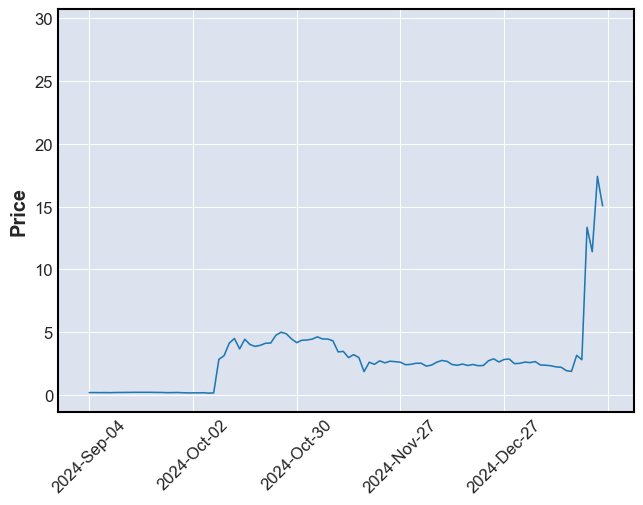

In [275]:
dwtx_last30days = dwtx_df.head(30)
mpf.plot(dwtx_df.tail(100), type='line')